[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alessandronascimento/BioMolComp/blob/main/P01/Pratica_01A.ipynb)

# Processamento e Análise de Cromatogramas

 O seguinte par de cromatogramas é fornecido:

[121107H07F](https://github.com/alessandronascimento/BioMolComp/raw/main/P01/121107H07F.abd) e [121107H07R](https://github.com/alessandronascimento/BioMolComp/raw/main/P01/121107H07R.abd)

Este par representa os sequenciamentos de uma mesmo molécula de DNA, entretanto cada uma das sequências foi gerada a partir de uma extremidade diferente do gene de acordo com a figura abaixo.

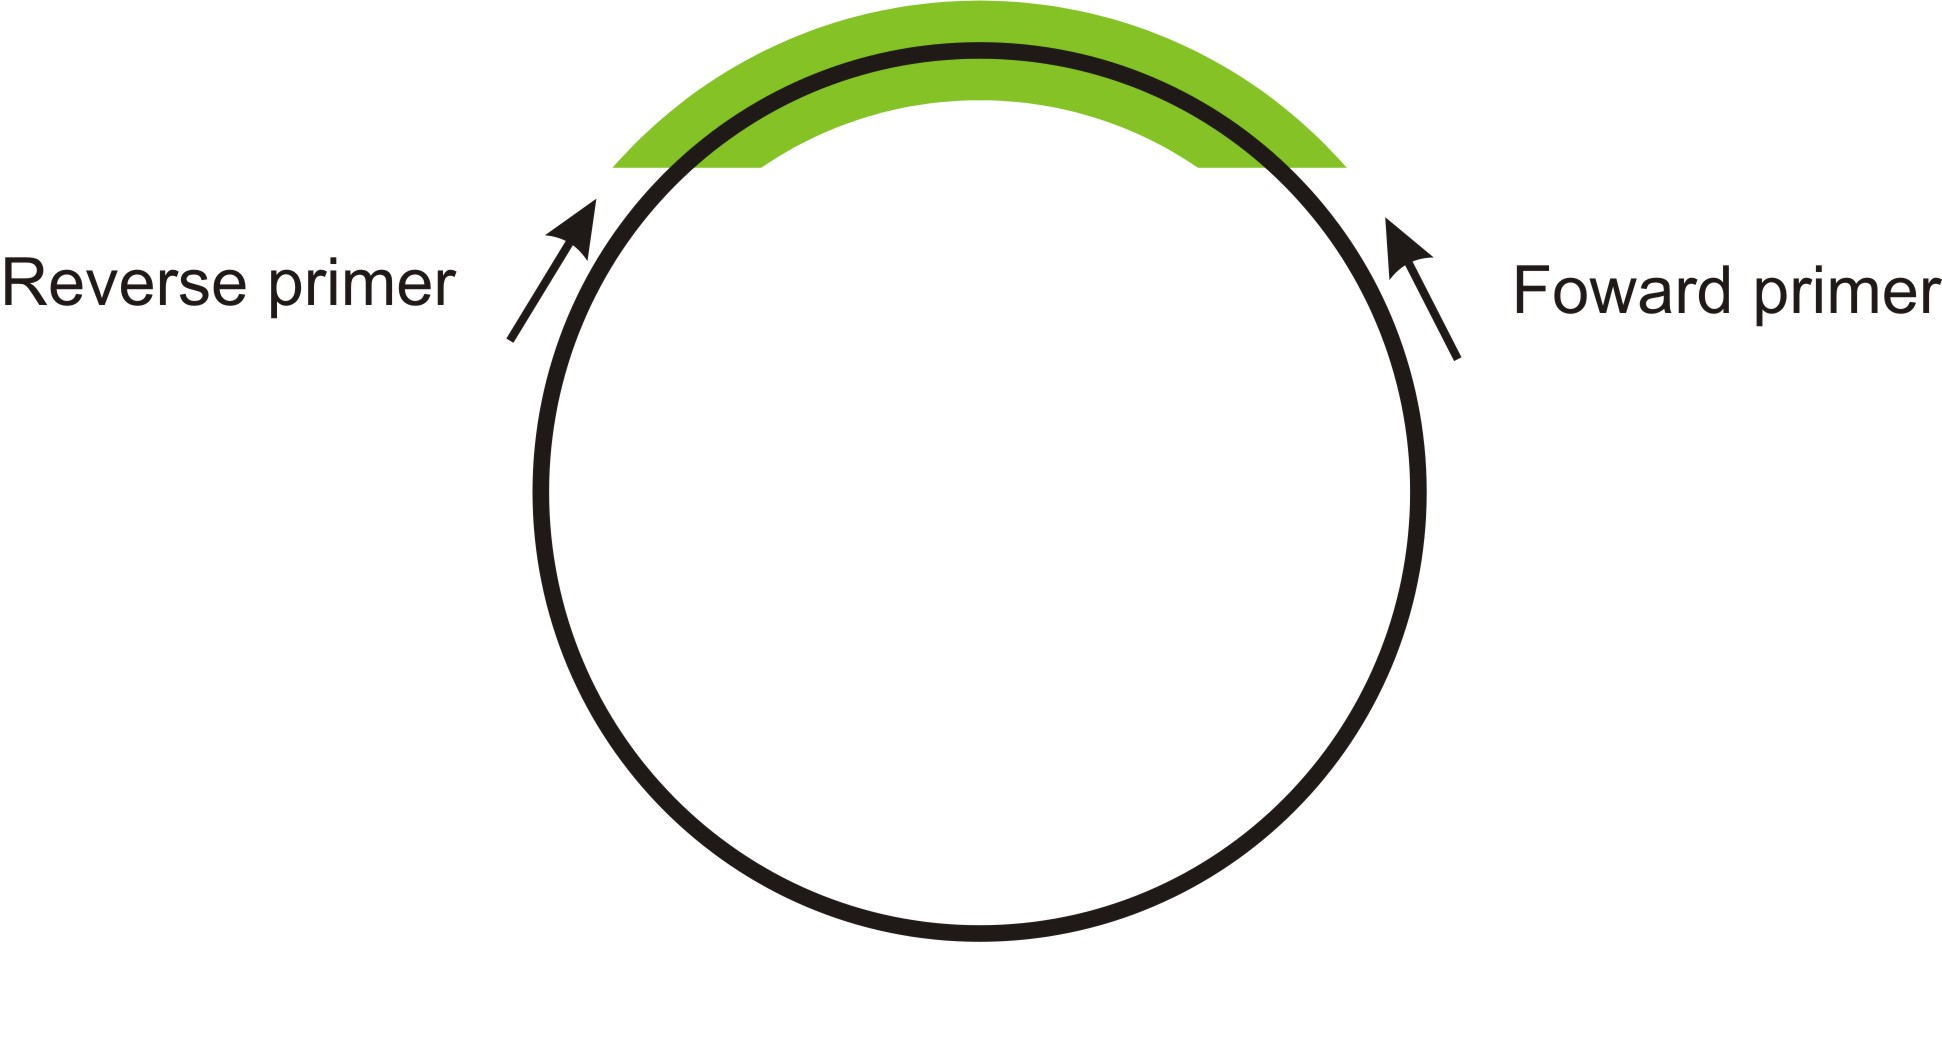

O círculo representa um vetor circular de DNA dupla fita e a porção verde corresponde ao inserto da molécula de DNA a ser sequenciada. As setas indicam os diferentes *primers* utilizados no sequenciamento. Estes *primers* são complementares às diferentes fitas do vetor.

É possível realizar o sequenciamento de cada uma das extremidades porque diferentes *primers* que são complementares à sequência do vetor em que se encontra este fragmento foram utilizados. A terminação do nome da sequência F ou R (*foward* ou *reverse*) se refere aos diferentes *primers* utilizados.


## Parte 1 ##

1. Baixe os cromatogramas utilizando os links acima:

2.  Abra o primeiro cromatograma com o programa [SnapGene Viewer](https://www.snapgene.com/snapgene-viewer);

3. Inspecione o cromatograma em toda sua extensão. Tente definir uma base a partir da qual você não considere a atribuição de bases totalmente confiável. O que pode ser dito, por exemplo, sobre a base de número 411 no sequenciamento *forward* ?

4. Repita o mesmo procedimento para o cromatograma da mesma molécula sequenciado com o outro primer (ex: 121107H07R);

5. No botão **Chromatogram Data**, selecione a sequência obtida com o primer *forward*.

## Parte 2

Nesta seção, vamos analisar as sequências obtidas a partir do sequenciamento de Sanger com os *primers* *forward* e *reverse*. Para esta finalidade, vamos usar alguns scripts em python, e empregando a biblioteca [BioPython](https://biopython.org/).

In [ ]:
!pip3 install biopython
import sys, os
from google.colab import data_table
from Bio import SeqIO
from Bio.Seq import Seq
from Bio import pairwise2

In [ ]:
#
# Entrada de dados de sequencias
#

seq_f = "" #@param {type:"string"}
seq_r = "" #@param {type:"string"}

my_seq_F = Seq(seq_f)
my_seq_R = Seq(seq_r)

# 
# Gerando a sequencia complementar e 
# comparando as sequencias forward/reverse 
# 

my_seq_rev = Seq(my_seq_R.reverse_complement())
align = pairwise2.align.globalxx(my_seq_F, my_seq_rev)

print(pairwise2.format_alignment(*align[0]))

Q1. **Analise a comparação entre as duas sequências obtidas no Google Collab. Todas as bases das sequências originais e da sequência consenso são coincidentes? Como você poderia decidir qual é a base correta?**

## Análise da Qualidade do Sequenciamento

A qualidade do sequenciamento de cada nucleotídeo pode ser avaliado pelo cálculo de um escore de qualidade. Este escore de qualidade é relacionado à probabilidade de erro de leitura da base seguindo a seguinte formula:

\begin{equation}
Q = -10 \log_{10}(Pe)
\end{equation}

onde $Q$ é o escore de qualidade, $Pe$ é a probabilidade de erro.


\begin{array}{c c c}
\hline
\textbf{Phred quality score} & \textbf{Probability that the base is called wrong} & \textbf{Accuracy} \\
\hline
10 & 1 in 10 & 90\% \\
20 & 1 in 100 & 99\% \\
30 & 1 in 1000 & 99.9\% \\
40 & 1 in 10000 & 99.99\% \\
50 & 1 in 100000 & 99.999\% \\
\hline
\end{array}

Este escore de erro é comumente utilizado como parâmetro para seleção de trechos de sequências de alta qualidade para deposição em bancos públicos. Normalmente bases com qualidade **acima de 20** são consideradas de **alta qualidade**.




1. Volte ao programa *SnapGene Viewer* e observe a qualidade do sequenciamento obtido para as sequências [121107G02F](https://github.com/alessandronascimento/BioMolComp/raw/main/P01/121107G02F.abd) e [121107G02R](https://github.com/alessandronascimento/BioMolComp/raw/main/P01/121107G02R.abd) (ao passar o mouse sobre o cromatograma, o programa mostra a qualidade). 

2. Verifique a qualidade das bases de todas as sequências. Veja onde a qualidade de bases começa a ser menor do que 20. 

3. Q2. **Repare que no sequenciamento há bases marcadas como $N$. Baseado no dado experimental, você saberia dizer o que estas bases representam? Por que observamos tantas bases como $N$?**